# TIKTOK DATA ANALYSIS

The dataset structure is as follows:

1. claim_status - Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.
2. video_id - int	Random identifying number assigned to video upon publication on TikTok.
3. video_duration_sec - int	How long the published video is measured in seconds.
4. video_transcription_text - Transcribed text of the words spoken in the published video.
5. verified_status - Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”
6. author_ban_status - Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”
7. video_view_count - The total number of times the published video has been viewed.
8. video_like_count - The total number of times the published video has been liked by other users.
9. video_share_count - The total number of times the published video has been shared by other users.
10. video_download_count - The total number of times the published video has been downloaded by other users.
11. video_comment_count - The total number of comments on the published video.

## Importing the required modules

In [1]:
# os for working with the operating system
import os as os
# Pandas for data manipulation
import pandas as pd
# Numpy fo numerical operations
import numpy as np
# Matplotlib for plots and visualizations
import matplotlib.pyplot as plt
# seaborn for plots and visualizations
import seaborn as sns

In [2]:
# Getting working directory
os.getcwd()

'c:\\Users\\EliteBook\\OneDrive\\Documents\\DATA SCIENCE\\JOURNEY TO GRADUATION\\YEAR 3 SEMESTER 1\\BDSC 3106 DATA SCIENCE IN THE SOCIETY\\ASSIGNMENTS\\CAT 3'

## Importing the required dataset

In [3]:
#importing the dataset and assigning it to tiktok_df
tiktok_df = pd.read_csv('tiktok_dataset.csv')
tiktok_df = tiktok_df.head(200)

Since our data and the notebook were in the same directory, we didn't have to indicate the file path.

## Understanding the structure of the data

In [4]:
# visualizing the first five rows
tiktok_df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
# showng the general information of the data
tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         200 non-null    int64  
 1   claim_status              200 non-null    object 
 2   video_id                  200 non-null    int64  
 3   video_duration_sec        200 non-null    int64  
 4   video_transcription_text  200 non-null    object 
 5   verified_status           200 non-null    object 
 6   author_ban_status         200 non-null    object 
 7   video_view_count          200 non-null    float64
 8   video_like_count          200 non-null    float64
 9   video_share_count         200 non-null    float64
 10  video_download_count      200 non-null    float64
 11  video_comment_count       200 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 18.9+ KB


with null values in the video_transcription_text video_view_count 19084 non-null  float64 video_like_count video_share_count video_download_count and  video_comment_count we had to  drop them.

In [6]:
tiktok_df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,5.746506e+09,33.590000,522528.965000,177183.355000,36455.965000,2184.440000,789.110000
std,57.879185,2.534991e+09,15.178731,290108.273635,154298.890577,42925.769841,2366.363116,1000.315738
min,1.000000,1.256736e+09,5.000000,2883.000000,193.000000,16.000000,0.000000,0.000000
25%,50.750000,3.552759e+09,21.000000,267508.250000,45213.500000,5060.750000,365.250000,75.500000
50%,100.500000,6.157871e+09,33.000000,533261.000000,134956.500000,19643.500000,1233.500000,314.000000
75%,150.250000,7.776245e+09,48.000000,755014.000000,274294.750000,52077.000000,3236.750000,1305.250000
max,200.000000,9.952828e+09,60.000000,998792.000000,616498.000000,214550.000000,10943.000000,5446.000000


## Data cleaning 
We checked for missing values and identified some in the video_view_count, video_like_count, video_share_count, video_download_count and video_comment_count

In [7]:
tiktok_clean_df = tiktok_df.dropna()

## Feature engineering

In general feature engineering is coming up with a new variable that does not exist in the original dataset.

In [8]:

conditions = [
    (tiktok_clean_df['video_duration_sec'] >= 5) & (tiktok_clean_df['video_duration_sec'] <= 20),
    (tiktok_clean_df['video_duration_sec'] >= 21) & (tiktok_clean_df['video_duration_sec'] <= 40),
    (tiktok_clean_df['video_duration_sec'] >= 41) & (tiktok_clean_df['video_duration_sec'] <= 60)
]

choices = ['short', 'average','long']

tiktok_clean_df['video_duration_clean'] = pd.np.select(conditions, choices)

tiktok_clean_df[['video_duration_sec', 'video_duration_clean']].head(10)

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_11760\47409627.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  tiktok_clean_df['video_duration_clean'] = pd.np.select(conditions, choices)


,video_duration_sec,video_duration_clean
0,59,long
1,32,average
2,31,average
3,25,average
4,19,short
5,35,average
6,16,short
7,41,long
8,50,long
9,45,long


### Average reach or engagement rate.


In [9]:
average_reach = tiktok_clean_df['video_view_count'].mean()


In [10]:
tiktok_clean_df['engagement_rate'] = (tiktok_clean_df['video_like_count'] + tiktok_clean_df['video_share_count'] + tiktok_clean_df['video_download_count'] + tiktok_clean_df['video_comment_count']) / tiktok_clean_df['video_view_count']

## Data analysis and understanding patterns

In [11]:
tiktok_clean_df.groupby('verified_status')[['video_like_count', 'video_share_count', 'video_download_count','video_comment_count', 'engagement_rate']].sum()

,video_like_count,video_share_count,video_download_count,video_comment_count,engagement_rate
verified_status,,,,,
not verified,33323276.0,6674909.0,410214.0,145496.0,79.496722
verified,2113395.0,616284.0,26674.0,12326.0,3.488693


Based on the verification status, most 

In [12]:
tiktok_clean_df.groupby('claim_status')[['video_like_count', 'video_share_count', 'video_download_count','video_comment_count', 'engagement_rate']].sum()



,video_like_count,video_share_count,video_download_count,video_comment_count,engagement_rate
claim_status,,,,,
claim,35436671.0,7291193.0,436888.0,157822.0,82.985415


In [13]:
tiktok_clean_df.groupby('author_ban_status')[['video_like_count', 'video_share_count', 'video_download_count','video_comment_count', 'engagement_rate']].sum()

,video_like_count,video_share_count,video_download_count,video_comment_count,engagement_rate
author_ban_status,,,,,
active,24916652.0,4966607.0,315725.0,116217.0,56.309955
banned,4480456.0,1047520.0,59502.0,19751.0,13.019186
under review,6039563.0,1277066.0,61661.0,21854.0,13.656274


In [14]:
tiktok_clean_df.groupby('video_duration_clean')[['video_like_count', 'video_share_count', 'video_download_count','video_comment_count', 'engagement_rate']].sum()

,video_like_count,video_share_count,video_download_count,video_comment_count,engagement_rate
video_duration_clean,,,,,
average,15572181.0,2861793.0,211890.0,68890.0,33.301209
long,11984003.0,2487760.0,136686.0,51858.0,28.246038
short,7880487.0,1941640.0,88312.0,37074.0,21.438167


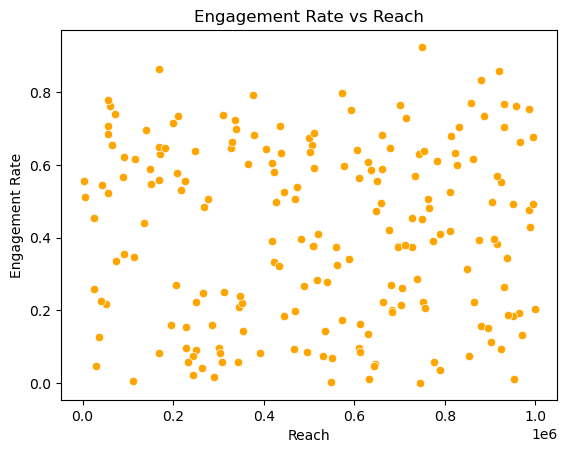

In [15]:
# Scatter plot: Reach vs Engagement
sns.scatterplot(x='video_view_count', y='engagement_rate', data=tiktok_clean_df, color='orange')
plt.title('Engagement Rate vs Reach')
plt.xlabel('Reach')
plt.ylabel('Engagement Rate')
plt.show()


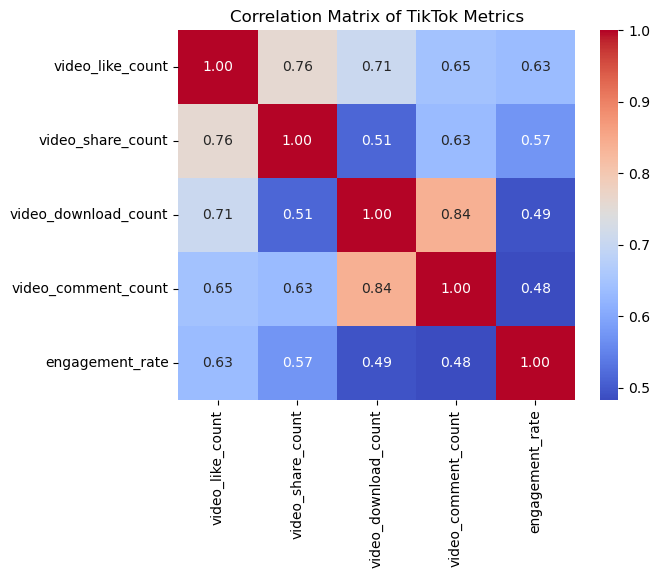

In [16]:
correlation_matrix = tiktok_clean_df[['video_like_count', 'video_share_count', 'video_download_count','video_comment_count', 'engagement_rate']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of TikTok Metrics')
plt.show()

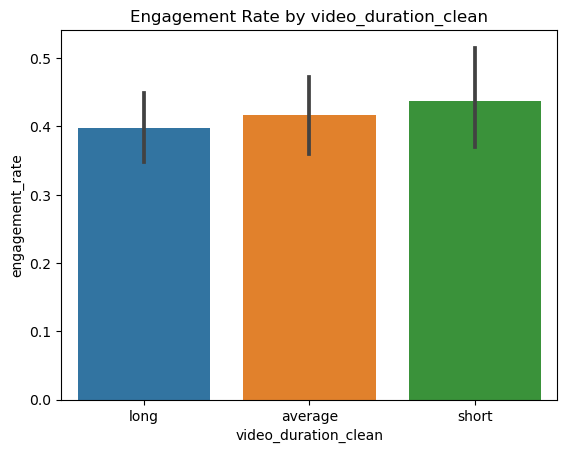

In [17]:
# Boxplot for Engagement by video_duration
sns.barplot(x='video_duration_clean', y='engagement_rate', data=tiktok_clean_df)
plt.title('Engagement Rate by video_duration_clean')
plt.show()

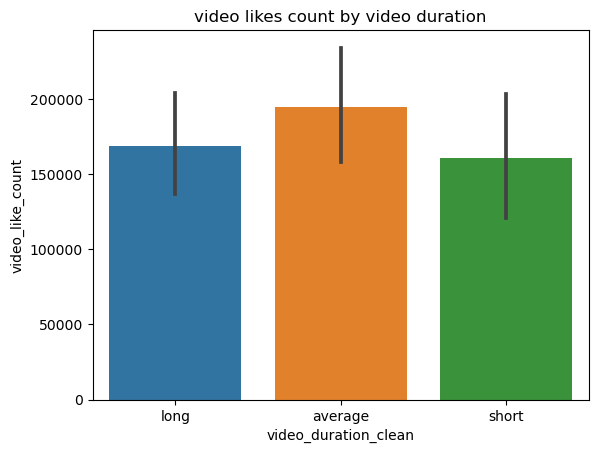

In [18]:
# Boxplot for Engagement by video_duration
sns.barplot(x='video_duration_clean', y='video_like_count', data=tiktok_clean_df)
plt.title('video likes count by video duration')
plt.show()

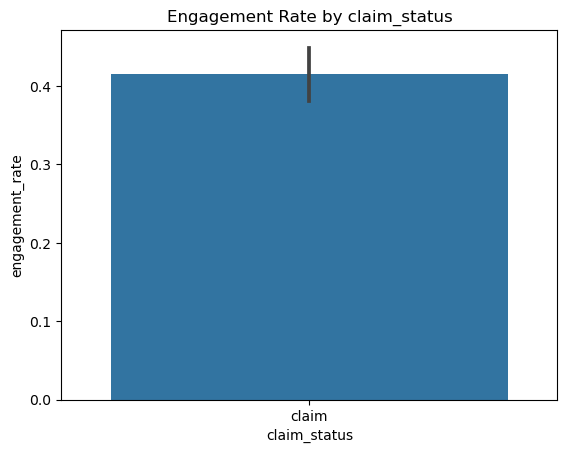

In [19]:
# Boxplot for Engagement by claim status
sns.barplot(x='claim_status', y='engagement_rate', data=tiktok_clean_df)
plt.title('Engagement Rate by claim_status')
plt.show()

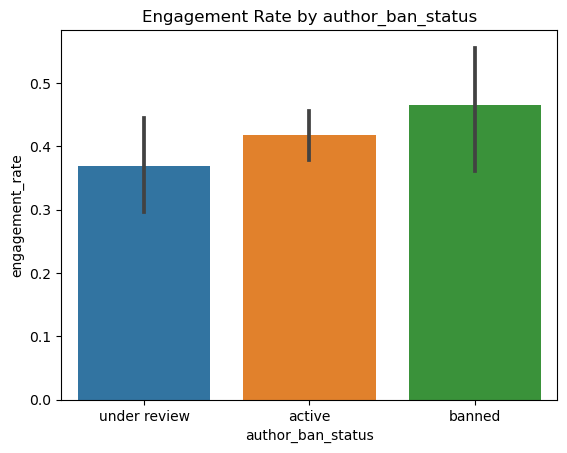

In [20]:
# Boxplot for Engagement by claim status
sns.barplot(x='author_ban_status', y='engagement_rate', data=tiktok_clean_df)
plt.title('Engagement Rate by author_ban_status')
plt.show()

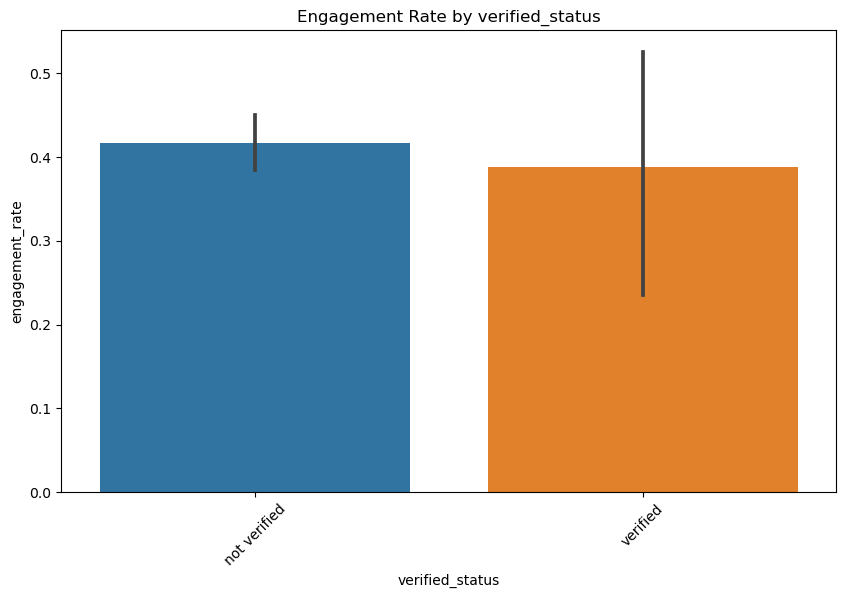

In [21]:
# Boxplot for Engagement by claim status
plt.figure(figsize=(10, 6))
sns.barplot(x='verified_status', y='engagement_rate', data=tiktok_clean_df)
plt.title('Engagement Rate by verified_status')
plt.xticks(rotation=45)
plt.show()

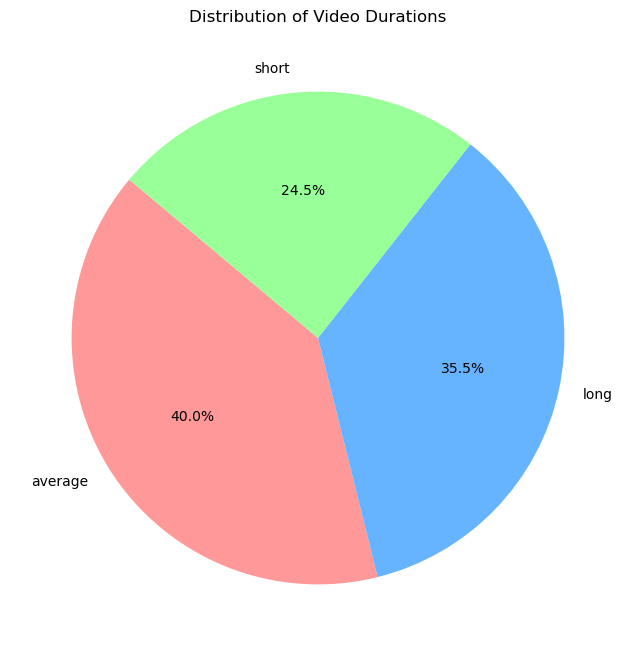

In [22]:


# Count the occurrences of each category
duration_counts = tiktok_clean_df['video_duration_clean'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Video Durations')
plt.show()


In [23]:
tiktok_clean_df.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'video_duration_clean',
       'engagement_rate'],
      dtype='object')

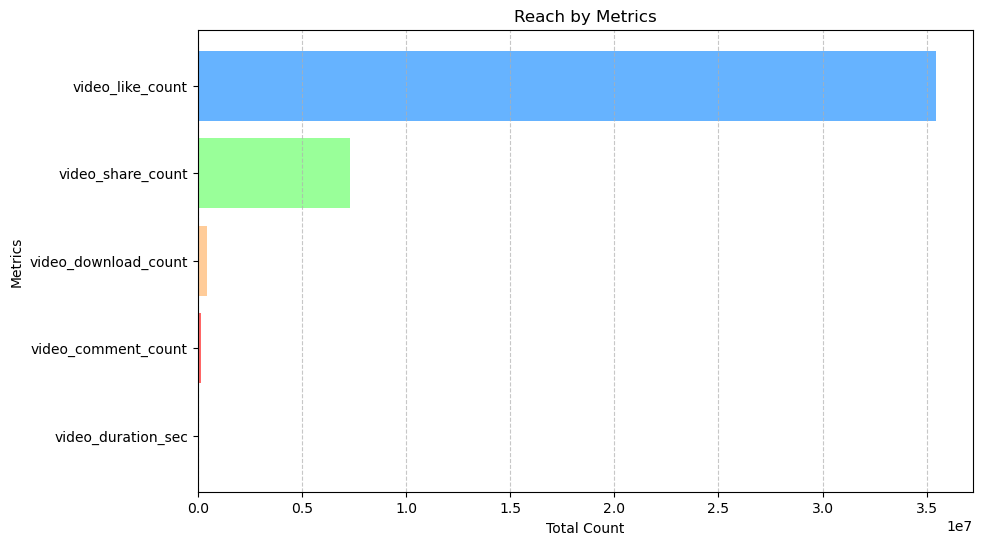

In [24]:
# Summing up metrics for reach (use actual column names from your dataset)
reach_metrics = ['video_like_count', 'video_share_count', 'video_download_count','video_comment_count','video_duration_sec']
reach_summary = tiktok_clean_df[reach_metrics].sum()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(reach_summary.index, reach_summary.values, color=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#66b3ff'])
plt.xlabel('Total Count')
plt.ylabel('Metrics')
plt.title('Reach by Metrics')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


#### Optimize Video Duration:
- The notebook includes a categorization of videos by duration (e.g., 5–20 seconds, 21–40 seconds). Shorter, engaging videos often perform better on platforms like TikTok. Focus on durations aligned with high engagement.
#### Focus on High-Performing Content:
- If the dataset includes metrics like likes, shares, or views, analyzing top-performing videos can highlight themes, trends, or types of content that resonate with the audience.
#### Engage Consistently:
- Consistent posting schedules can help the algorithm prioritize your content. Look for trends in the dataset regarding posting times or days that yield better performance.
#### Target Audience Insights:
- Use demographic data (if available in the dataset) to tailor content for specific audience segments. Identifying trends in who engages with your content can refine your strategy.
#### Use Trending Hashtags and Sounds:
- If the analysis includes hashtag or sound popularity, leveraging trending ones can boost discoverability. TikTok heavily favors content that aligns with current trends.
#### Improve Video Quality and Creativity:
- Visual appeal and creativity are key. Insights from the notebook may suggest certain video styles or techniques that increase engagement.
#### Engage with Viewers:
- Responding to comments and creating duet or stitch videos can encourage interaction and further boost reach.